In [68]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, 
    roc_curve, 
    recall_score, 
    confusion_matrix, 
    precision_score, 
    f1_score, 
    accuracy_score, 
    classification_report
    )

data is downloaded from https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [43]:
df = pd.read_csv("/content/data.csv", engine='c')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [44]:
# Shape
print(f'Numbers of observations: ', df.shape[0])
print(f'Numbers of fields:', df.shape[1])

Numbers of observations:  7043
Numbers of fields: 21


In [45]:
# Column names
for i in df.columns:
    print(i)

customerID
gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [46]:
# general information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [47]:
# Descriptive analysis
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [48]:
# Check missing values
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [99]:
#Removing missing values 
df.dropna(inplace = True)
df.shape

(7032, 21)

#EDA

## Gender distribution

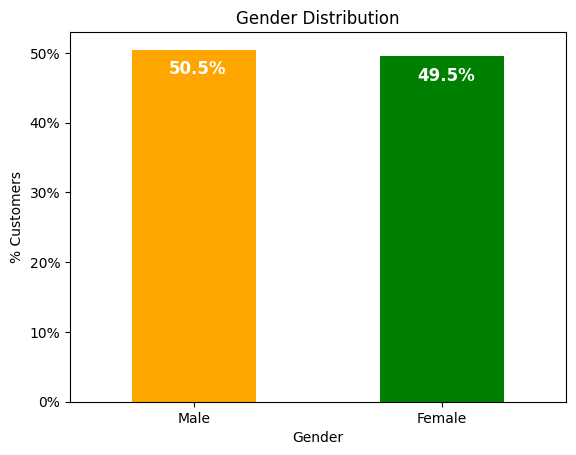

In [51]:
colors = ['orange','green']
ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                       stacked = True,
                                                       rot = 0,
                                                       color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

## Senior Citizen

There are only 16.2% of the customers who are senior citizens. Therefore, most of our customers in the dataset are young.

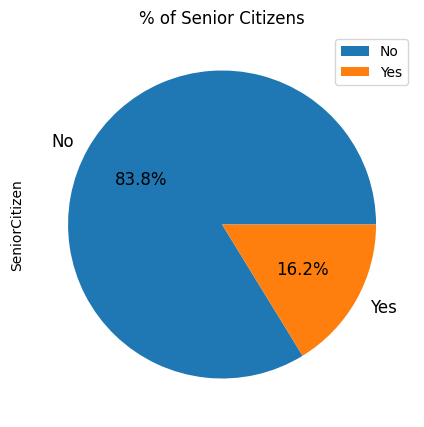

In [61]:
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('% of Senior Citizens', fontsize = 12)

plt.legend()
plt.show()



## Martial Status



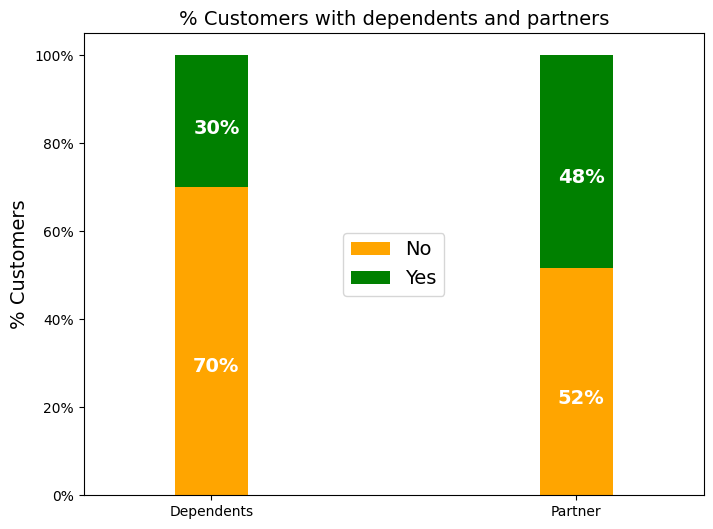

In [63]:
df2 = pd.melt(df, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/df.shape[0]
colors = ['orange','green']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

## Tenure

<ipython-input-76-123879a1303a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['tenure'], hist=True, kde=False,


Text(0.5, 1.0, '# of Customers by their tenure')

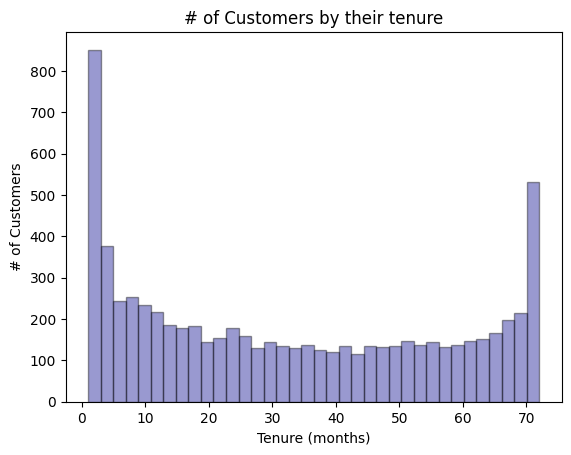

In [76]:
ax = sns.distplot(df['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')


## Contract

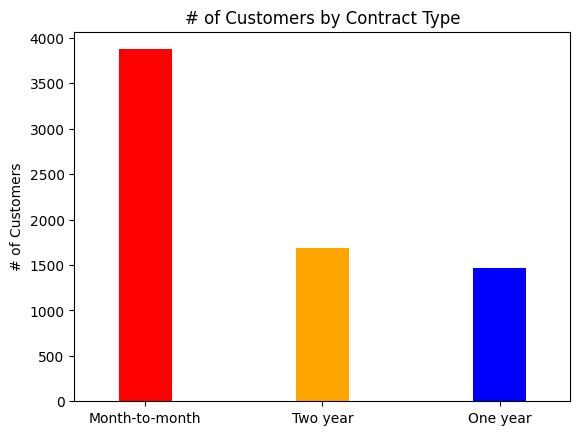

In [91]:
colors = ['red','orange', 'blue']
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3, color = colors)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')
plt.show()

## Churn rate

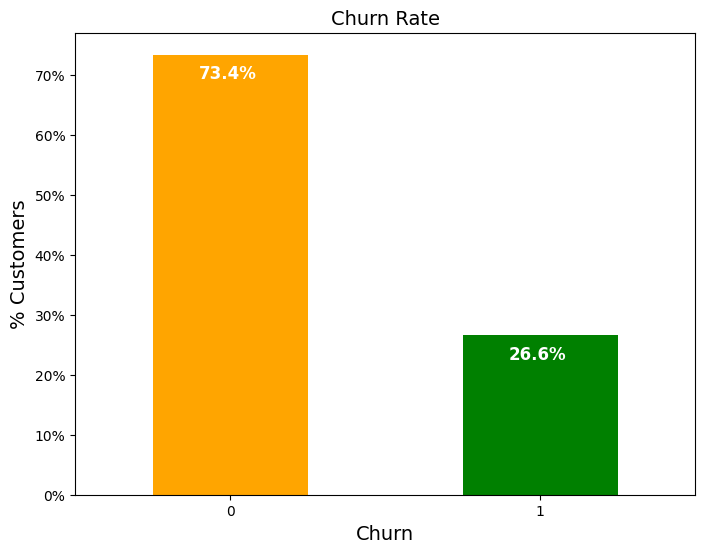

In [94]:
colors = ['orange', 'green']
ax = (df['Churn'].value_counts()*100.0 /df.shape[0]).plot(kind='bar',
    stacked = True,rot = 0, color = colors, figsize = (8,6))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

total = sum([i.get_width() for i in ax.patches])


for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
            weight = 'bold')

# Modeling

In [104]:
# Remove CustomerID column:

df.drop( columns=df.columns[0], axis=1, inplace=True)
df

Dependents  tenure PhoneService     MultipleLines InternetService  \
0            No       1           No  No phone service             DSL   
1            No      34          Yes                No             DSL   
2            No       2          Yes                No             DSL   
3            No      45           No  No phone service             DSL   
4            No       2          Yes                No     Fiber optic   
...         ...     ...          ...               ...             ...   
7038        Yes      24          Yes               Yes             DSL   
7039        Yes      72          Yes               Yes     Fiber optic   
7040        Yes      11           No  No phone service             DSL   
7041         No       4          Yes               Yes     Fiber optic   
7042         No      66          Yes                No     Fiber optic   

     OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0                No          Yes               No          No          No   
1               Yes           No              Yes          No          No   
2               Yes          Yes               No          No          No   
3               Yes           No              Yes         Yes          No   
4                No           No               No          No          No   
...             ...          ...              ...         ...         ...   
7038            Yes           No              Yes         Yes         Yes   
7039             No          Yes              Yes          No         Yes   
7040            Yes           No               No          No          No   
7041             No           No               No          No          No   
7042            Yes           No              Yes         Yes         Yes   

     StreamingMovies        Contract PaperlessBilling  \
0                 No  Month-to-month              Yes   
1                 No        One year               No   
2                 No  Month-to-month              Yes   
3                 No        One year               No   
4                 No  Month-to-month              Yes   
...              ...             ...              ...   
7038             Yes        One year              Yes   
7039             Yes        One year              Yes   
7040              No  Month-to-month              Yes   
7041              No  Month-to-month              Yes   
7042             Yes        Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0              Electronic check           29.85         29.85      0  
1                  Mailed check           56.95       1889.50      0  
2                  Mailed check           53.85        108.15      1  
3     Bank transfer (automatic)           42.30       1840.75      0  
4              Electronic check           70.70        151.65      1  
...                         ...             ...           ...    ...  
7038               Mailed check           84.80       1990.50      0  
7039    Credit card (automatic)          103.20       7362.90      0  
7040           Electronic check           29.60        346.45      0  
7041               Mailed check           74.40        306.60      1  
7042  Bank transfer (automatic)          105.65       6844.50      0  

[7032 rows x 17 columns]

In [105]:
# Label Encoder 

def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [106]:
df = df.apply(lambda x: object_to_int(x))
df.head()

Dependents  tenure  PhoneService  MultipleLines  InternetService  \
0           0       1             0              1                0   
1           0      34             1              0                0   
2           0       2             1              0                0   
3           0      45             0              1                0   
4           0       2             1              0                1   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0               0             2                 0            0            0   
1               2             0                 2            0            0   
2               2             2                 0            0            0   
3               2             0                 2            2            0   
4               0             0                 0            0            0   

   StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  \
0                0         0                 1              2           29.85   
1                0         1                 0              3           56.95   
2                0         0                 1              3           53.85   
3                0         1                 0              0           42.30   
4                0         0                 1              2           70.70   

   TotalCharges  Churn  
0         29.85      0  
1       1889.50      0  
2        108.15      1  
3       1840.75      0  
4        151.65      1

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        7032 non-null   int64  
 1   tenure            7032 non-null   int64  
 2   PhoneService      7032 non-null   int64  
 3   MultipleLines     7032 non-null   int64  
 4   InternetService   7032 non-null   int64  
 5   OnlineSecurity    7032 non-null   int64  
 6   OnlineBackup      7032 non-null   int64  
 7   DeviceProtection  7032 non-null   int64  
 8   TechSupport       7032 non-null   int64  
 9   StreamingTV       7032 non-null   int64  
 10  StreamingMovies   7032 non-null   int64  
 11  Contract          7032 non-null   int64  
 12  PaperlessBilling  7032 non-null   int64  
 13  PaymentMethod     7032 non-null   int64  
 14  MonthlyCharges    7032 non-null   float64
 15  TotalCharges      7032 non-null   float64
 16  Churn             7032 non-null   int64  


In [114]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [109]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [113]:
cls = SVC(random_state=1)
cls.fit(X_train, y_train)
test_pred = cls.predict(X_test)
print(classification_report(test_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85      2110
           1       0.00      0.00      0.00         0

    accuracy                           0.73      2110
   macro avg       0.50      0.37      0.42      2110
weighted avg       1.00      0.73      0.85      2110



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [115]:
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 10, 100, 1000], 
              'gamma': [0.1, 0.01, 0.001, 0.0001, 0.00001],
              'kernel': ['rbf', 'sigmoid']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END ...C=0.0001, gamma=0.1, kernel=rbf;, score=0.734 total time=   1.2s
[CV 2/5] END ...C=0.0001, gamma=0.1, kernel=rbf;, score=0.734 total time=   1.1s
[CV 3/5] END ...C=0.0001, gamma=0.1, kernel=rbf;, score=0.734 total time=   1.5s
[CV 4/5] END ...C=0.0001, gamma=0.1, kernel=rbf;, score=0.735 total time=   0.7s
[CV 5/5] END ...C=0.0001, gamma=0.1, kernel=rbf;, score=0.735 total time=   1.0s
[CV 1/5] END C=0.0001, gamma=0.1, kernel=sigmoid;, score=0.734 total time=   0.6s
[CV 2/5] END C=0.0001, gamma=0.1, kernel=sigmoid;, score=0.734 total time=   0.6s
[CV 3/5] END C=0.0001, gamma=0.1, kernel=sigmoid;, score=0.734 total time=   0.8s
[CV 4/5] END C=0.0001, gamma=0.1, kernel=sigmoid;, score=0.735 total time=   0.8s
[CV 5/5] END C=0.0001, gamma=0.1, kernel=sigmoid;, score=0.735 total time=   0.7s
[CV 1/5] END ..C=0.0001, gamma=0.01, kernel=rbf;, score=0.734 total time=   0.8s
[CV 2/5] END ..C=0.0001, gamma=0.01, kerne

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [116]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1000, 'gamma': 1e-05, 'kernel': 'rbf'}
SVC(C=1000, gamma=1e-05)


In [117]:
grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))


              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.64      0.50      0.56       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110

